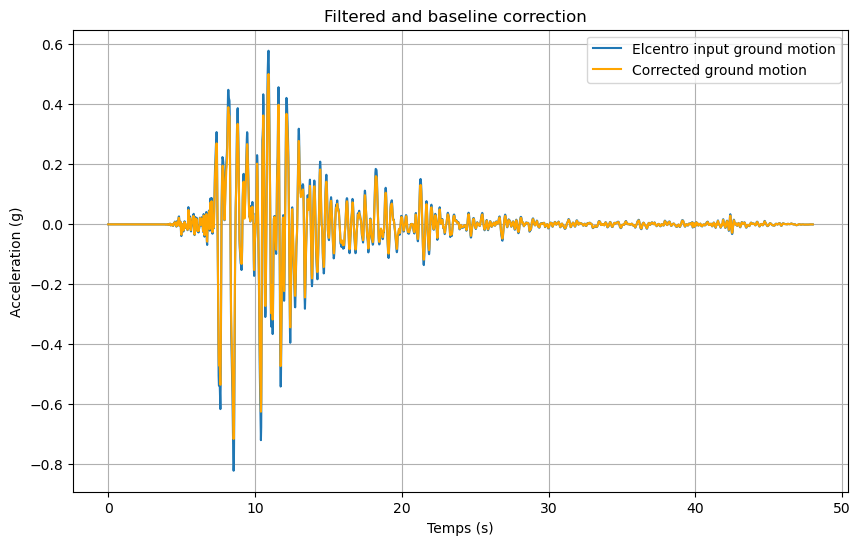

In [7]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("Kobe.txt", header=None, sep=r'\s+')
time = data[0].astype(float)
acceleration = data[1].astype(float)

# Paramètres du filtre
cutoff_frequency = 15  # Fréquence de coupure en Hz
sampling_rate =1 / (time[1] - time[0])  # Fréquence d'échantillonnage
nyquist_frequency = 0.5 * sampling_rate  # Fréquence de Nyquist

# Normalisation de la fréquence de coupure
normalized_cutoff = cutoff_frequency / nyquist_frequency

# Conception du filtre Butterworth d'ordre 4
order = 4
b, a = butter(order, normalized_cutoff, btype='low', analog=False)

# Application du filtre
filtered_acceleration = filtfilt(b, a, acceleration)

# Correction de baseline (87% des amplitudes)
corrected_acceleration = 0.87 * filtered_acceleration

output_data = pd.DataFrame({"Time": time, "corrected_acceleration": corrected_acceleration})
output_data.to_csv("corrected_accelerationK.txt", index=False, sep="\t")

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(time, acceleration, label="Elcentro input ground motion")
plt.plot(time, corrected_acceleration, label="Corrected ground motion ", linestyle='-', color='orange')
plt.xlabel("Temps (s)")
plt.ylabel("Acceleration (g)")
plt.title("Filtered and baseline correction  ")
plt.legend()
plt.grid()
plt.savefig("filtered_acceleration_elcentro.png")
plt.show()
